### IS727272 - Cordero Hernández, Marco Ricardo

# 4.3.2 Multiclass Perceptron

The multiclass perceptron should be regarded as direct extension of the binary Perceptron. The binary case can be extended as follows:

Algorithm:

```
w(k, n) = 0
iterate over epochs:
    iterate over observations (i):
        y_hat = argmax(x_i w.T)
        if y_hat != y_i
            w[y] = w[y] + x_i
            w[y_hat] = w[y_hat] - x_i
```
So, if prediction is wrong, we need to lower the score of wrong answer and raise score of right amswer.

### Digit Recognizer
The data file train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.


In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load dataset
data = pd.read_csv('./Datasets/train.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


X shape: (42000, 784)


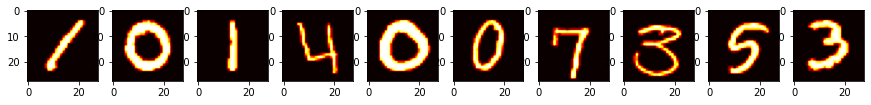

In [3]:
# Plot the first row of training data 
y = data.label
x = data.loc[:, 'pixel0':].values
m, n = x.shape
print(f'X shape: ({m}, {n})')

plt.subplots(1, 10, figsize = (15, 15))

for i in range(10):
    digit = x[i, :].reshape(28, 28)
    ax = plt.subplot(1, 10, i + 1)
    ax.imshow(digit, cmap = 'hot')

In [4]:
# Add bias to x
X = np.concatenate([np.ones((m, 1)), x], axis = 1)
m, n = X.shape
y = np.array(y)

# Split Dataset
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(X, y)
# print(np.shape(xTrain), np.shape(xTest))

yTrain = yTrain.reshape(-1, 1)
yTest = yTest.reshape(-1, 1)

# Initialize the W matrix (one row per class)
k = 10 # [0, 9]
m, n = xTrain.shape
w = np.zeros((k, n))
print(w.shape)

# Define number of iterations or epochs
epochs = 20

# Multiclass Perceptron
for i in range(epochs):
    correct = 0 # correct classifications counter
    yt = [] # prediction
    
    for j in range(m):
        product = np.dot(xTrain[j, :], w.T)
        y_hat = np.argmax(product)
        yt.append(y_hat)
        
        if y_hat != yTrain[j]:
            w[yTrain[j], :] = w[yTrain[j], :] + xTrain[j, :]
            w[y_hat, :] = w[y_hat, :] - xTrain[j, :]
        else:
            correct += 1
    
print(f'Correct {correct} from {m}')
print('W', w)

(10, 785)
Correct 28204 from 31500
W [[ -234.     0.     0. ...     0.     0.     0.]
 [  117.     0.     0. ...     0.     0.     0.]
 [  452.     0.     0. ...     0.     0.     0.]
 ...
 [  465.     0.     0. ...     0.     0.     0.]
 [-1596.     0.     0. ...     0.     0.     0.]
 [ -300.     0.     0. ...     0.     0.     0.]]


In [5]:
# Performance measurement for Training
yt = np.array(yt)
print('y', yTrain.shape)
print('yt', yt.shape)
print('Correct', correct, 'misclassified', m - correct)
print("Accuracy: ", correct / len(yTrain))

y (31500, 1)
yt (31500,)
Correct 28204 misclassified 3296
Accuracy:  0.8953650793650794


In [6]:
# Performance measurement for Testing
print(w.shape)
product1 = np.dot(xTest, w.T)
y_hat1 = np.argmax(product1, axis = 1)
y_hat1 = y_hat1.reshape(-1, 1)
accuracy = np.sum((y_hat1 == yTest)) / len(yTest)
print(f'Acc: {accuracy}')

(10, 785)
Acc: 0.8728571428571429


### Confusion Matrix 

For evaluating the classification for each class we will use the confusion matrix measurement.


In [7]:
# Obtainig the metrics for the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yTrain, yt)
print(cm)

[[2940    0   13    8    5   31   21    6   20    6]
 [   0 3376   30   15    2    9    4   14   71    3]
 [  17   33 2750   82   27   22   42   33   97   22]
 [  10   10   94 2843    3  132   10   28   96   39]
 [   6   12   22    4 2826    7   32   22   35  156]
 [  37   12   25  129   33 2327   56    7  159   34]
 [  18    6   49    8   26   48 2940    2   24    1]
 [   3    8   39   25   22    5    1 2993   14  168]
 [  16   48   68  130   19  135   26   12 2555   57]
 [  13   12   11   42  150   32    0  148   67 2654]]


In [8]:
# # Obtainig the metrics for the other confusion matrix
cm_1 = confusion_matrix(yTest, y_hat1)
print(cm_1)

[[1034    0    4    4    2   11   14    2    9    2]
 [   0 1067    3   36    0    2    2    6   44    0]
 [   8    4  856   34    6    2   26    9   93   14]
 [   6    2   15  964    0   23    3    5   52   16]
 [  10    0    9    4  660    4   28    8   45  182]
 [  13    1    4   76    3  756   19    5   85   14]
 [   9    0    8    0    2   14  969    0   13    0]
 [   2    2    8   15    2    2    3 1000   15   74]
 [   5    9    7   25    2   29    5    2  900   13]
 [   1    1    2   19    4    6    0   29   38  959]]


In [9]:
# Function for plotting the confusion matrix
def plot_confusion_matrix(values, classes):
    import itertools
    m, n = values.shape

    accuracy = np.trace(values) / float(np.sum(values))
    misclass = 1 - accuracy

    plt.figure(figsize=(10, 10))
    plt.imshow(values, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.title('Confusion matrix')
    plt.colorbar()

    marks = np.arange(len(classes))
    plt.xticks(marks, classes, rotation=45)
    plt.yticks(marks, classes)

    thresh = values.max() / 2
    for i, j in itertools.product(range(m), range(n)):
        plt.text(j, i, "{:,}".format(values[i, j]),
                 horizontalalignment="center",
                 color="white" if values[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('Predicted label')
    plt.xlabel('True label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

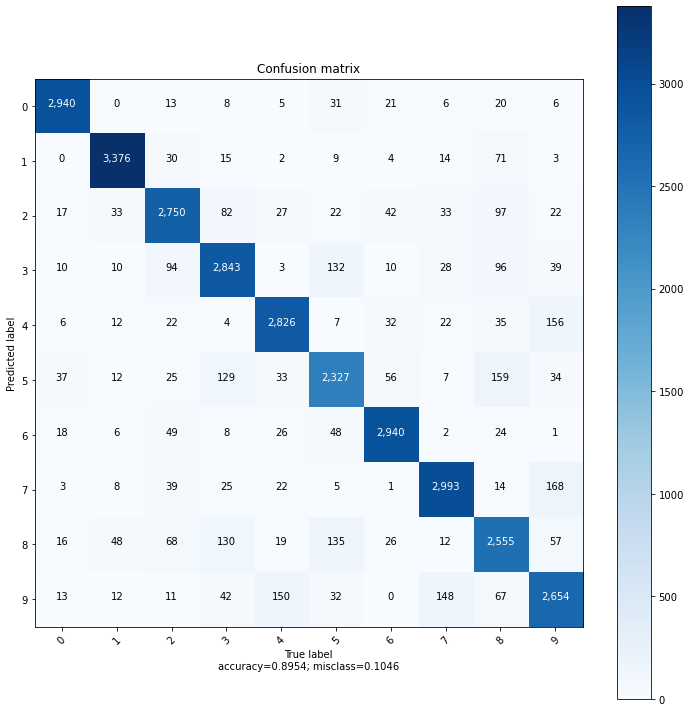

In [10]:
# Plotting confusion matrix for k = 10

mat = confusion_matrix(yTrain, yt)
plot_confusion_matrix(values = mat, classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])